<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/main/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка датасетов

In [1]:
from IPython.display import clear_output

## Датасет на русском языке

In [2]:
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu

!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu

!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu /content/ru_syntagrus-ud-train-a.conllu
!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu /content/ru_syntagrus-ud-train-b.conllu
!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu /content/ru_syntagrus-ud-train-c.conllu

!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu /content/ru_syntagrus-ud-dev.conllu

!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu /content/ru_syntagrus-ud-test.conllu

clear_output()

## Датасет на английском языке

In [3]:
!wget -m https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu
!wget -m https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu
!wget -m https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu

!mv /content/github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu /content/en_ewt-ud-train.conllu
!mv /content/github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu /content/en_ewt-ud-dev.conllu
!mv /content/github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu /content/en_ewt-ud-test.conllu

clear_output()

## Датасет на китайском языке

In [4]:
!wget -m https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu
!wget -m https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu
!wget -m https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu

!mv /content/github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu /content/zh_gsd-ud-train.conllu
!mv /content/github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu /content/zh_gsd-ud-dev.conllu
!mv /content/github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu /content/zh_gsd-ud-test.conllu

clear_output()

In [5]:
!rm -r /content/github.com
clear_output()

# Хранение токенов и предложения



In [6]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc

In [7]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.words = []

    def add_word(self, word):
        self.words.append(word)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.words) > 0


# Чтение информации из файла

In [8]:
def read_conll(filename):
    fh = open(filename,'r',encoding='utf-8')
    sents_read = 0
    sents = []
    comments = set()

    sent = Sentence()
    for line in fh:
        tok = line.strip().split('\t')
        if not tok or line.strip() == '': # empty line, add sentence to list
            if sent.is_not_empty:
                sents_read += 1
                sents.append(sent)
            sent = Sentence()
        else:
            if line[0] == '#' or '-' in tok[0]: # a comment line
                line = line.strip()
                if line[:12] == "# sent_id = ":
                    sent.set_sent_id(line[12:])
                elif line[:9] == "# text = ":
                    sent.set_text(line[9:])
                else:
                    comments.add(line)

            else: # an actual ConllEntry, add to tokens
                if tok[2] == "_":
                    tok[2] = tok[1].lower()

                word = ConllEntry(*tok)
                sent.add_word(word)
    fh.close()
    return sents

In [9]:
def create_lang_dicts():
  return {'rus': {'train': [], 'dev': [], 'test': []},
          'eng': {'train': [], 'dev': [], 'test': []},
          'chi': {'train': [], 'dev': [], 'test': []}}

In [10]:
splitted_sents = {'rus': {'train': [], 'dev': [], 'test': []},
          'eng': {'train': [], 'dev': [], 'test': []},
          'chi': {'train': [], 'dev': [], 'test': []}}

In [11]:
splitted_sents['rus']['train'] = read_conll("/content/ru_syntagrus-ud-train-a.conllu") + \
                                 read_conll("/content/ru_syntagrus-ud-train-b.conllu") + \
                                 read_conll("/content/ru_syntagrus-ud-train-c.conllu")

splitted_sents['rus']['dev'] = read_conll("/content/ru_syntagrus-ud-dev.conllu")
splitted_sents['rus']['test'] = read_conll("/content/ru_syntagrus-ud-test.conllu")

In [12]:
splitted_sents['eng']['train'] = read_conll("/content/en_ewt-ud-train.conllu")
splitted_sents['eng']['dev'] = read_conll("/content/en_ewt-ud-dev.conllu")
splitted_sents['eng']['test'] = read_conll("/content/en_ewt-ud-test.conllu")

splitted_sents['chi']['train'] = read_conll("/content/zh_gsd-ud-train.conllu")
splitted_sents['chi']['dev'] = read_conll("/content/zh_gsd-ud-dev.conllu")
splitted_sents['chi']['test'] = read_conll("/content/zh_gsd-ud-test.conllu")

In [13]:
for lang in splitted_sents:
    print(lang, ":", [(k, len(v)) for k, v in splitted_sents[lang].items()])

rus : [('train', 69630), ('dev', 8906), ('test', 8800)]
eng : [('train', 12544), ('dev', 2001), ('test', 2077)]
chi : [('train', 3997), ('dev', 500), ('test', 500)]


In [14]:
def sentence_is_not_complex(s):
  return all('.' not in w.id for w in s.words)

sents = {}
for lang in splitted_sents:
    lang_sents = splitted_sents[lang]['train'] + \
                  splitted_sents[lang]['dev'] + \
                  splitted_sents[lang]['test']
    sents[lang] = [s for s in lang_sents if sentence_is_not_complex(s)]
    print(lang, ". Normal sentence amount: ", len(sents[lang]), ", complex sentence amount: ", len(lang_sents) - len(sents[lang]), sep="")

rus. Normal sentence amount: 85572, complex sentence amount: 1764
eng. Normal sentence amount: 16582, complex sentence amount: 40
chi. Normal sentence amount: 4997, complex sentence amount: 0


In [15]:
languages = sents.keys()
languages

dict_keys(['rus', 'eng', 'chi'])

# Количество токенов в предложении

In [16]:
from collections import Counter

In [17]:
token_counters = {lang: Counter([len(s.words) for s in lang_sents]) for lang, lang_sents in sents.items()}

In [18]:
for lang, lang_counter in token_counters.items():
  print(lang, ". All token amount: ", sum([length * rate for length, rate in token_counters[lang].items()]), sep="")

rus. All token amount: 1474199
eng. All token amount: 253634
chi. All token amount: 123291


In [19]:
for lang, lang_counter in token_counters.items():
  print(lang, ". Average token amount: ", sum([token_amount * rate for token_amount, rate in lang_counter.items()]) / lang_counter.total(), sep="")

rus. Average token amount: 17.227586126302995
eng. Average token amount: 15.295742371245929
chi. Average token amount: 24.673003802281368


In [20]:
for lang, token_counter in token_counters.items():
    lang_token_lengths = token_counter.keys()
    print(lang, ". The shortest sentence length: ", min(lang_token_lengths), ", the longest sentence length: ", max(lang_token_lengths), sep="")

rus. The shortest sentence length: 2, the longest sentence length: 205
eng. The shortest sentence length: 1, the longest sentence length: 159
chi. The shortest sentence length: 4, the longest sentence length: 111


In [21]:
len_lang = {lang: t_counter.total() for lang, t_counter in token_counters.items()}

In [22]:
lang_russian_title = {'rus': 'русский', 'eng': 'английский', 'chi': 'китайский'}

In [23]:
import matplotlib.pyplot as plt

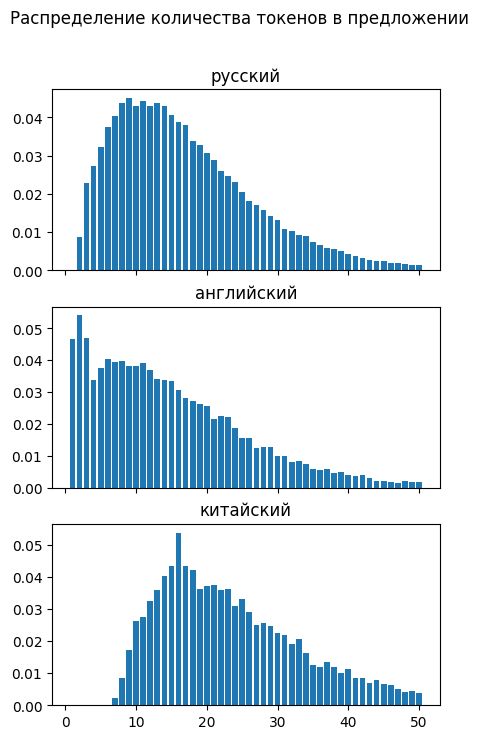

In [24]:
#define grid of plots
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex=True, figsize=(5, 8))

#add title
fig.suptitle('Распределение количества токенов в предложении')

#add data to plots
for bar_i, lang in enumerate(token_counters):
  x, y = zip(*([(i, j / len_lang[lang]) for i, j in token_counters[lang].items() if i <= 50]))
  axs[bar_i].bar(x, height=y)
  axs[bar_i].title.set_text(lang_russian_title[lang])


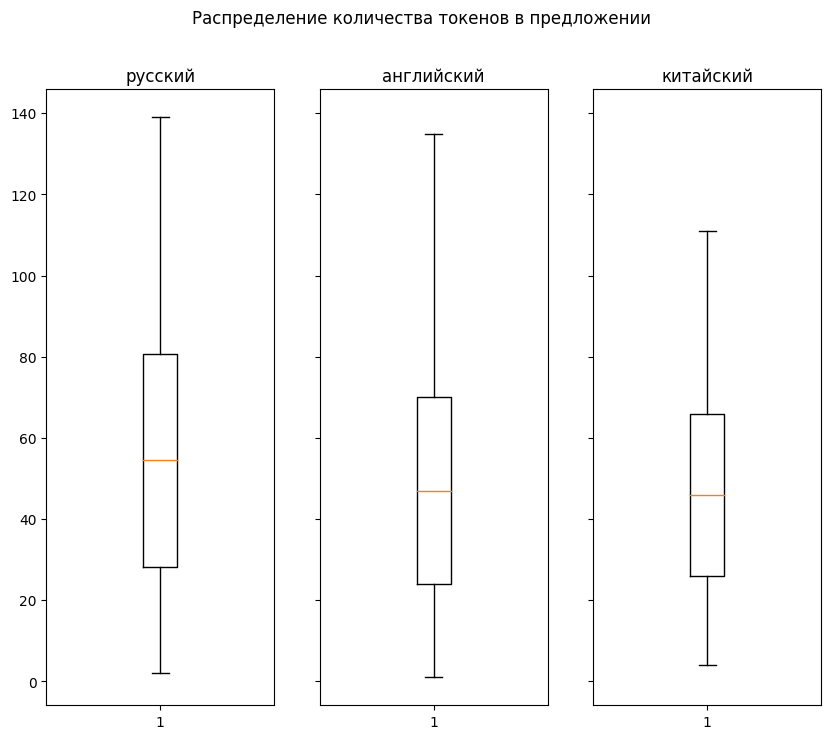

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,8), sharey=True)
fig.suptitle('Распределение количества токенов в предложении')

for col_i, lang in enumerate(token_counters):
    ax[col_i].boxplot(x=token_counters[lang], showfliers=False,showcaps=True)
    ax[col_i].title.set_text(lang_russian_title[lang])

plt.show()

## Группировка датасетов по токенам

In [26]:
import pandas as pd

In [27]:
def create_node_df(cur_sents):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.words):
        info.append((w.id, w.parent_id, w.relation, w.pos, w.form, w.lemma, sent_i))
    info_df = pd.DataFrame(info, columns=["id", "parent_id", "relation", "pos", "form", "lemma", "sent_i"])
    return info_df

In [28]:
node_df_dict = {}
for lang in sents:
    node_df_dict[lang] = create_node_df(sents[lang])

In [29]:
node_df_dict['rus']

,id,parent_id,relation,pos,form,lemma,sent_i
0,1,0,root,NOUN,Анкета,анкета,0
1,2,1,punct,PUNCT,.,.,0
2,1,8,nsubj,NOUN,Начальник,начальник,1
3,2,3,amod,ADJ,областного,областной,1
4,3,1,nmod,NOUN,управления,управление,1
...,...,...,...,...,...,...,...
1474194,10,9,nsubj,PRON,она,она,85571
1474195,11,13,cc,CCONJ,и,и,85571
1474196,12,13,advmod,ADV,застенчиво,застенчиво,85571
1474197,13,9,conj,VERB,улыбнулась,улыбнуться,85571


# Начальная форма

In [30]:
for lang, node_df_lang in node_df_dict.items():
  print(lang, f"{len(set(node_df_dict[lang]['lemma'])) / len(node_df_dict[lang]):.2f}")

rus 0.04
eng 0.07
chi 0.16


# Часть речи

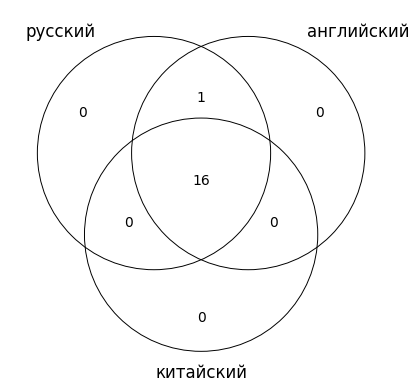

In [31]:
from matplotlib_venn import venn3_unweighted, venn3_circles

pos_set = [set(node_df_dict[lang]['pos']) for lang in languages]

venn3_unweighted(pos_set,
      set_colors=('#ffffff', '#ffffff', '#ffffff'),
      set_labels = [lang_russian_title[lang] for lang in languages],
      alpha=0.75)
venn3_circles((1,1,1,1,1,1,1), lw=0.7)

plt.show()

In [32]:
(set(node_df_dict['rus']['pos']) & set(node_df_dict['eng']['pos'])) - set(node_df_dict['chi']['pos'])

{'INTJ'}

In [33]:
relative_pos_rate = {}
for lang, node_df in node_df_dict.items():
  node_amount = len(node_df)
  relative_pos_rate[lang] = {i: j / node_amount for i, j in node_df.groupby('pos').size().items()}

In [34]:
pos_df_list = []
pos_rows = []
for pos in relative_pos_rate['rus']:
  pos_df_list.append([relative_pos_rate[lang].get(pos, 0) for lang in languages])
  pos_rows.append(pos)
pos_df = pd.DataFrame(pos_df_list, pos_rows, languages)

In [35]:
pos_df.round(4)

,rus,eng,chi
ADJ,0.0965,0.0660,0.0246
ADP,0.0928,0.0858,0.0457
ADV,0.0504,0.0491,0.0250
AUX,0.0091,0.0625,0.0316
CCONJ,0.0360,0.0321,0.0141
DET,0.0272,0.0789,0.0108
INTJ,0.0002,0.0037,0.0000
NOUN,0.2380,0.1692,0.2761
NUM,0.0125,0.0198,0.0540
PART,0.0328,0.0277,0.0802


In [36]:
for lang in languages:
    print(lang)
    print(pos_df[lang].sort_values(ascending=False)[:5].round(2))

rus
NOUN     0.24
PUNCT    0.18
VERB     0.11
ADJ      0.10
ADP      0.09
Name: rus, dtype: float64
eng
NOUN     0.17
PUNCT    0.12
VERB     0.11
PRON     0.09
ADP      0.09
Name: eng, dtype: float64
chi
NOUN     0.28
VERB     0.15
PUNCT    0.14
PROPN    0.09
PART     0.08
Name: chi, dtype: float64


# Тип связи

In [37]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['relation'])))

rus 45
eng 52
chi 43


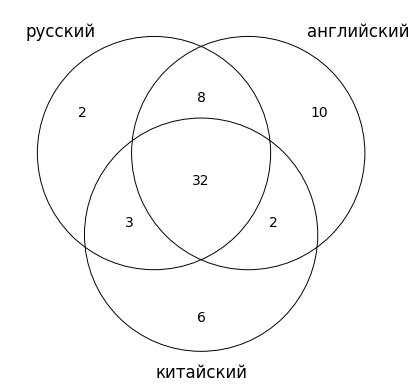

In [38]:
from matplotlib_venn import venn3_unweighted, venn3_circles

relations_set = [set(node_df_dict[lang]['relation']) for lang in languages]

venn3_unweighted(relations_set,
      set_colors=('#ffffff', '#ffffff', '#ffffff'),
      set_labels = [lang_russian_title[lang] for lang in languages],
      alpha=0.75)
venn3_circles((1,1,1,1,1,1,1), lw=0.7)

plt.show()

In [39]:
relative_relation_rate = {}
for lang, node_df in node_df_dict.items():
  node_amount = len(node_df)
  relative_relation_rate[lang] = {i: (j / node_amount) for i, j in node_df.groupby('relation').size().items()}

In [40]:
relation_set = {r for lang in languages for r in relative_relation_rate[lang]}

In [41]:
relation_df_list = []
relation_rows = list(relation_set)
for relation in relation_rows:
  relation_df_list.append([relative_relation_rate[lang].get(relation) for lang in languages])
relation_df = pd.DataFrame(relation_df_list, relation_rows, languages)

In [42]:
for lang in languages:
    print(lang)
    print(relation_df[lang].sort_values(ascending=False)[:5].round(2))

rus
punct    0.18
case     0.09
nmod     0.08
obl      0.08
amod     0.08
Name: rus, dtype: float64
eng
punct    0.12
case     0.08
nsubj    0.08
det      0.08
root     0.07
Name: eng, dtype: float64
chi
punct    0.14
nmod     0.13
nsubj    0.08
case     0.07
obj      0.06
Name: chi, dtype: float64


In [43]:
[relation_df[lang] > 0.001 for lang in languages][0]

obl:tmod        False
compound         True
flat:name        True
nmod:npmod      False
csubj            True
                ...  
aux:pass         True
compound:ext    False
nsubj            True
mark             True
det              True
Name: rus, Length: 63, dtype: bool

In [44]:
relation_df[((relation_df['rus'] > 0.05) | (relation_df['eng'] > 0.05) | (relation_df['chi'] > 0.05))].round(3)

,rus,eng,chi
case,0.092,0.084,0.074
punct,0.184,0.116,0.138
root,0.058,0.065,0.041
amod,0.080,0.048,0.017
nmod,0.082,0.033,0.132
nummod,0.006,0.012,0.051
obl,0.081,0.042,0.027
advmod,0.064,0.055,0.026
obj,0.033,0.048,0.063
nsubj,0.068,0.078,0.076


In [45]:
relation_df.round(6)

,rus,eng,chi
obl:tmod,0.000543,0.002724,NaN
compound,0.001123,0.037538,0.045129
flat:name,0.005134,NaN,0.009863
nmod:npmod,NaN,0.000627,NaN
csubj,0.005406,0.001360,0.003033
...,...,...,...
aux:pass,0.002266,0.006419,0.003447
compound:ext,NaN,NaN,0.000203
nsubj,0.067931,0.078097,0.076445
mark,0.017629,0.033880,0.036905
